In [17]:
import math
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Enumeration - mass ordering
massOrdering = ['NMO', 'IMO']
enumMassOrdering = enumerate(massOrdering)

#Enumeration - progenitor
progenitor = ['ONeMg', 'Fe']
enumProgenitor = enumerate(progenitor)

#Enumeration - matter type
matterType = ['matter', 'antimatter']
enumMatterType = enumerate(matterType)

#Enumeraiton  - flavor
flavor = ['electron', 'mu', 'tau']
enumFlavor = enumerate(flavor)

In [10]:
#Prompts user input
#Global variables - luminosities & mean energies (will depend on progenitor)
luminosity_e = float(raw_input("What is the luminosity of electron neutrinos?: "))
luminosity_anti_e = float(raw_input("What is the luminosity of electron antineutrinos?: "))
luminosity_mu = float(raw_input("What is the luminosity of mu neutrinos?: "))
luminosity_anti_mu = float(raw_input("What is the luminosity of mu antineutrinos?: "))
luminosity_tau = float(raw_input("What is the luminosity of tau neutrinos?: "))
luminosity_anti_tau = float(raw_input("What is the luminosity of tau antineutrinos?: "))
meanEnergy_e = float(raw_input("What is the mean energy of electron neutrinos?: "))
meanEnergy_anti_e = float(raw_input("What is the mean energy of electron antineutrinos?: "))
meanEnergy_mu = float(raw_input("What is the mean energy of mu neutrinos?: "))
meanEnergy_anti_mu = float(raw_input("What is the mean energy of mu antineutrinos?: "))
meanEnergy_tau = float(raw_input("What is the mean energy of tau neutrinos?: "))
meanEnergy_anti_tau = float(raw_input("What is the mean energy of tau antineutrinos?: "))

#Create 2D arrays for luminosity & mean energies
lumEnergy = [[luminosity_e, meanEnergy_e], [luminosity_anti_e, meanEnergy_anti_e],
            [luminosity_mu, meanEnergy_mu], [luminosity_anti_mu, meanEnergy_anti_mu],
            [luminosity_tau, meanEnergy_tau], [luminosity_anti_tau, meanEnergy_anti_tau]]
print(lumEnergy)

What is the luminosity of electron neutrinos?: 1
What is the luminosity of electron antineutrinos?: 2
What is the luminosity of mu neutrinos?: 3
What is the luminosity of mu antineutrinos?: 45
What is the luminosity of tau neutrinos?: 5
What is the luminosity of tau antineutrinos?: 6
What is the mean energy of electron neutrinos?: 7
What is the mean energy of electron antineutrinos?: 8
What is the mean energy of mu neutrinos?: 9
What is the mean energy of mu antineutrinos?: 1
What is the mean energy of tau neutrinos?: 2
What is the mean energy of tau antineutrinos?: 3
[[1.0, 7.0], [2.0, 8.0], [3.0, 9.0], [45.0, 1.0], [5.0, 2.0], [6.0, 3.0]]


In [ ]:
#Prompts user input

#distance between supernova and detector on Earth
dist = float(raw_input("What is the distance between the supernova and Earth? (kpc): "))

#progenitor type, prompt user to enter either 'ONeMg' or 'Fe', still need to make case insensitive 
p = raw_input("What is the progenitor type? Please enter either 'ONeMg' or 'Fe': ")

#compactness, prompt user to enter either 2.5 or 5 
comp = float(raw_input("What is the compactness? Please enter either 2.5 or 5: "))

#accretion timescale - units? 
timeAcc = float(raw_input("What is the accretion timescale? "))

#stiffness parameter prompt 
stiff = float(raw_input("What is the stiffness parameter? "))

#prompt user to enter either NMO or IMO, still need to make case insensitive 
mass_ordering = raw_input("What is the mass ordering? Please enter either NMO or IMO: ")

In [6]:
#Factorial definition
def factorial(n):
    if n == 0:
        return 1
    else:
        return n * factorial(n - 1)

In [7]:
#2D array of spectral pinching parameters
alpha_e = 3 #electron neutrino
alpha_anti_e = 3 #electron antineutrino
alpha_mu = 2 #mu neutrino, tau neutrino, 
alpha_anti_mu = 2 #mu antineutrino, tau antineutrino
alpha_tau = 2 #mu neutrino, tau neutrino, 
alpha_anti_tau = 2 #mu antineutrino, tau antineutrino
alpha = [[alpha_e, alpha_anti_e], [alpha_mu, alpha_anti_mu], [alpha_tau, alpha_anti_tau]]
print(alpha)

[[3, 3], [2, 2], [2, 2]]


In [14]:
#Float range
def frange(start, stop, step = 0.0002):
    while start < stop:
        yield start
        start +=step

0	0.0	0.0	0.0	0.0	0.0	0.0
0.0002	2.03066773391e-14	2.08312501042e-14	2.4689711989e-10	2.42854243731e-05	1.68699382593e-07	3.99920007999e-08
0.0004	1.62434853669e-13	1.66633336666e-13	9.87522642524e-10	9.7083429956e-05	6.74595121476e-07	1.59936012798e-07
0.0006	5.48154981269e-13	5.6233127531e-13	2.22177782222e-09	0.000218306694082	1.51738373991e-06	3.59784064787e-07
0.0008	1.29918183956e-12	1.33280010665e-12	3.94956392646e-09	0.000387867998849	2.69676194322e-06	6.39488204745e-07
0.001	2.53717455102e-12	2.6028649088e-12	6.1707822359e-09	0.000605680231018	4.21242661872e-06	9.99000499833e-07
0.0012	4.38373659706e-12	4.49730080984e-12	8.88533404435e-09	0.000871656381908	6.0640748356e-06	1.43827303639e-06
0.0014	6.96041583396e-12	7.14083300032e-12	1.20931206588e-08	0.00118570954729	8.25140384484e-06	1.9572579199e-06
0.0016	1.03887045087e-11	1.06581367458e-11	1.57940433993e-08	0.00154775292727	1.07741110791e-05	2.55590727505e-06
0.0018	1.47900392751e-11	1.51738373991e-11	1.99880035993e-08	0.0

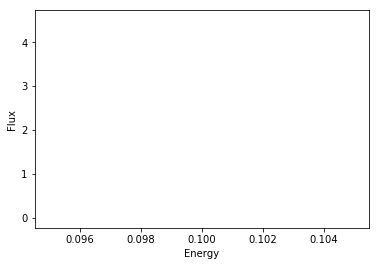

In [22]:
#Functions

#Overall number of neutrinos emitted
ratio_e = lumEnergy[0][0] / lumEnergy[0][1]
ratio_anti_e = lumEnergy[1][0] / lumEnergy[1][1]
ratio_mu = lumEnergy[2][0] / lumEnergy[2][1]
ratio_anti_mu = lumEnergy[3][0] / lumEnergy[3][1]
ratio_tau = lumEnergy[4][0] / lumEnergy[4][1]
ratio_anti_tau = lumEnergy[5][0] / lumEnergy[5][1]

#First numerators
num_e = (alpha[0][0] + 1) ** (alpha[0][0] + 1)
num_anti_e = (alpha[0][1] + 1) ** (alpha[0][1] + 1)
num_mu = (alpha[1][0] + 1) ** (alpha[1][0] + 1)
num_anti_mu = (alpha[1][1] + 1) ** (alpha[1][1] + 1)
num_tau = (alpha[2][0] + 1) ** (alpha[2][0] + 1)
num_anti_tau = (alpha[2][1] + 1) ** (alpha[2][1] + 1)

#First denominators, with gamma functions - option to use math.factorial from package?
den_e = lumEnergy[0][1] * factorial(alpha[0][0])
den_anti_e = lumEnergy[1][1] * factorial(alpha[0][1])
den_mu = lumEnergy[2][1] * factorial(alpha[1][0])
den_anti_mu = lumEnergy[3][1] * factorial(alpha[1][1])
den_tau = lumEnergy[4][1] * factorial(alpha[2][0])
den_anti_tau = lumEnergy[5][1] * factorial(alpha[2][1])

#First part of equation
frac_e = (num_e) / (den_e)
frac_anti_e = (num_anti_e) / (den_anti_e)
frac_mu = (num_mu) / (den_mu)
frac_anti_mu = (num_anti_mu) / (den_anti_mu)
frac_tau = (num_tau) / (den_tau)
frac_anti_tau = (num_anti_tau) / (den_anti_tau)

#Creating a textfile called 'data.txt,' will create a new one to write into if it doesn't exist
f = open("data.txt", "w+")

plt.figure()

#File-output for energies of neutrinos (tab delimited) - will output from for loop
#Can change start, stop, and step later - first testing to see if for loop works and writes a text file
for E in frange(0, 0.1002, 0.0002): 
    flux_e = (ratio_e) * (frac_e) * ((E / lumEnergy[0][1]) ** alpha[0][0]) * math.exp(-((alpha[0][0] + 1) * E) / lumEnergy[0][1])
    flux_anti_e = (ratio_anti_e) * (frac_anti_e) * ((E / lumEnergy[1][1]) ** alpha[0][1]) * math.exp(-((alpha[0][1] + 1) * E) / lumEnergy[1][1])
    flux_mu = (ratio_mu) * (frac_mu) * ((E / lumEnergy[2][1]) ** alpha[1][0]) * math.exp(-((alpha[1][0] + 1) * E) / lumEnergy[2][1])
    flux_anti_mu = (ratio_anti_mu) * (frac_anti_mu) * ((E / lumEnergy[3][1]) ** alpha[1][1]) * math.exp(-((alpha[1][1] + 1) * E) / lumEnergy[3][1])
    flux_tau = (ratio_tau) * (frac_tau) * ((E / lumEnergy[4][1]) ** alpha[2][0]) * math.exp(-((alpha[2][0] + 1) * E) / lumEnergy[4][1])
    flux_anti_tau = (ratio_anti_tau) * (frac_anti_tau) * ((E / lumEnergy[5][1]) ** alpha[2][1]) * math.exp(-((alpha[2][1] + 1) * E) / lumEnergy[5][1])
    print(str(E)+ '\t' + str(flux_e) + '\t' + str(flux_anti_e) + '\t' + str(flux_mu) + '\t' + str(flux_anti_mu) + '\t' + str(flux_tau) + '\t' + str(flux_anti_tau))
    stringData = str(E)+ '\t' + str(flux_e) + '\t' + str(flux_anti_e) + '\t' + str(flux_mu) + '\t' + str(flux_anti_mu) + '\t' + str(flux_tau) + '\t' + str(flux_anti_tau)
    file = open("data.txt", "a")
    file.write(stringData + '\n')
    file.close()

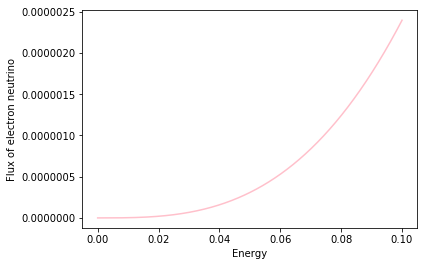

In [40]:
#Plotting energy and flux of electron neutrino 
f = open("data.txt")

lines = f.readlines()

E, flux_e = [], []

for line in lines:
    E.append(line.split()[0])
    
for line in lines:
    flux_e.append(line.split()[1])
    
f.close()

plt.plot(E, flux_e, 'pink')
plt.xlabel("Energy")
plt.ylabel("Flux of electron neutrino")
plt.show()

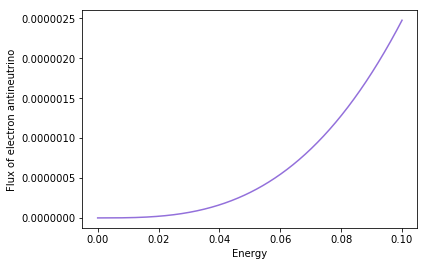

In [41]:
#Plotting energy and flux of electron antineutrino 
f = open("data.txt")

lines = f.readlines()

E, flux_anti_e = [], []

for line in lines:
    E.append(line.split()[0])
    
for line in lines:
    flux_anti_e.append(line.split()[2])
    
f.close()

plt.plot(E, flux_anti_e, 'mediumpurple')
plt.xlabel("Energy")
plt.ylabel("Flux of electron antineutrino")
plt.show()

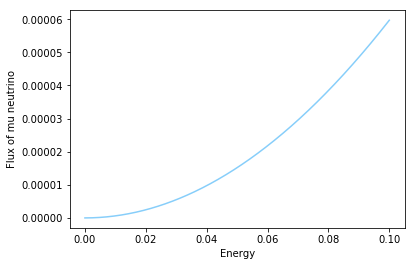

In [42]:
#Plotting energy and flux of mu neutrino 
f = open("data.txt")

lines = f.readlines()

E, flux_mu = [], []

for line in lines:
    E.append(line.split()[0])
    
for line in lines:
    flux_mu.append(line.split()[3])
    
f.close()

plt.plot(E, flux_mu, 'lightskyblue')
plt.xlabel("Energy")
plt.ylabel("Flux of mu neutrino")
plt.show()

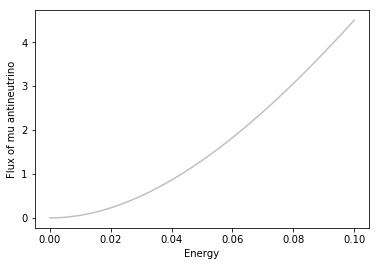

In [43]:
#Plotting energy and flux of mu antineutrino 
f = open("data.txt")

lines = f.readlines()

E, flux_anti_mu = [], []

for line in lines:
    E.append(line.split()[0])
    
for line in lines:
    flux_anti_mu.append(line.split()[4])
    
f.close()

plt.plot(E, flux_anti_mu, 'silver')
#plt.plot(E, flux_tau, 'gold')
#plt.plot(E, flux_anti_tau, 'red')
plt.xlabel("Energy")
plt.ylabel("Flux of mu antineutrino")
plt.show()

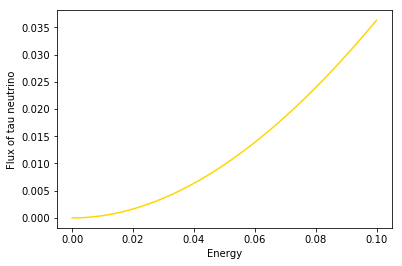

In [44]:
#Plotting energy and flux of tau neutrino 
f = open("data.txt")

lines = f.readlines()

E, flux_tau = [], []

for line in lines:
    E.append(line.split()[0])
    
for line in lines:
    flux_tau.append(line.split()[5])
    
f.close()

plt.plot(E, flux_tau, 'gold')
plt.xlabel("Energy")
plt.ylabel("Flux of tau neutrino")
plt.show()

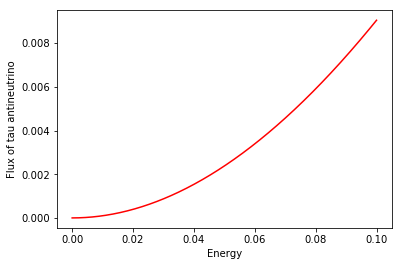

In [45]:
#Plotting energy and flux of tau antineutrino 
f = open("data.txt")

lines = f.readlines()

E, flux_anti_tau = [], []

for line in lines:
    E.append(line.split()[0])
    
for line in lines:
    flux_anti_tau.append(line.split()[6])
    
f.close()

plt.plot(E, flux_anti_tau, 'red')
plt.xlabel("Energy")
plt.ylabel("Flux of tau antineutrino")
plt.show()